# Table of contents

1. Importing libraries and data
2. Distributions and summary statistics
3. Preparing data for regression analysis
4. Regression analysis
5. Comparing values
6. Removing outliers and rerunning analysis

# 1. Importing libraries and data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Let graphs be displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
# Importing data

df = pd.read_csv(r'/Users/zoey/Career Foundry Stuff/Achievement 6/cleaned_NBA_data.csv')

In [4]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,attended_college
0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,True
1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,True
2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,12,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,True
3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,7,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,True
4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,True


# 2. Distributions and summary statistics

In [5]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'attended_college'],
      dtype='object')

/var/folders/dp/t07shk_d0y5674zpckdywhzc0000gn/T/ipykernel_4005/78630028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=25)
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

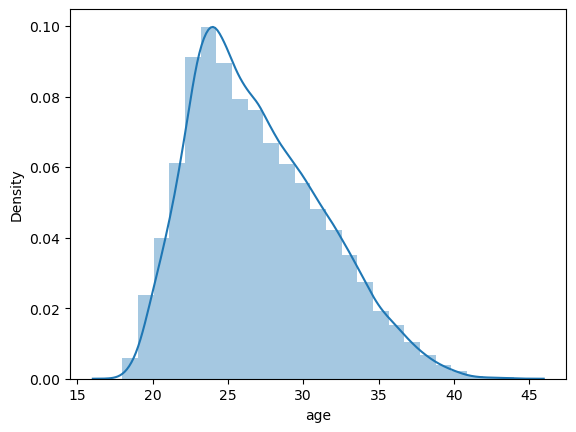

In [7]:
# Looking at the distribution of the age

sns.distplot(df['age'], bins=25)

In [8]:
# Checking the mean

df['age'].mean()

27.045312986608533

In [9]:
# Checking the median

df['age'].median()

26.0

In [10]:
# Checking the max

df['age'].max()

44

In [11]:
# Checking the min

df['age'].min()

18

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

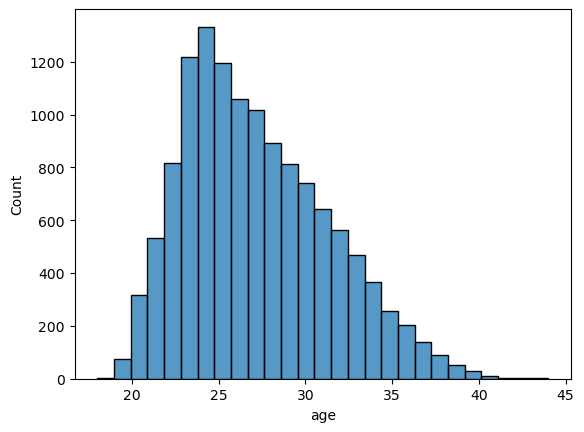

In [13]:
# Redoing the histogram with the correct amount of bins to represent the full age range of 18 - 44

sns.histplot(df['age'], bins=27)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gp', ylabel='Count'>

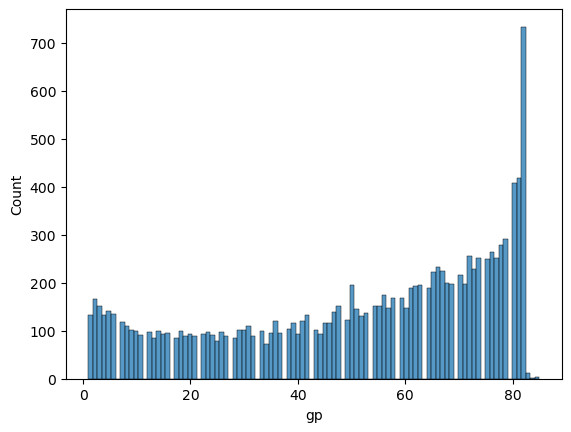

In [14]:
# Looking at the distribution of games played

sns.histplot(df['gp'], bins=100)

In [15]:
# Checking the mean

df['gp'].mean()

51.15415758330738

In [16]:
# Checking the median

df['gp'].median()

57.0

In [17]:
# Checking the max

df['gp'].max()

85

In [18]:
# Checking the min

df['gp'].min()

1

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gp', ylabel='Count'>

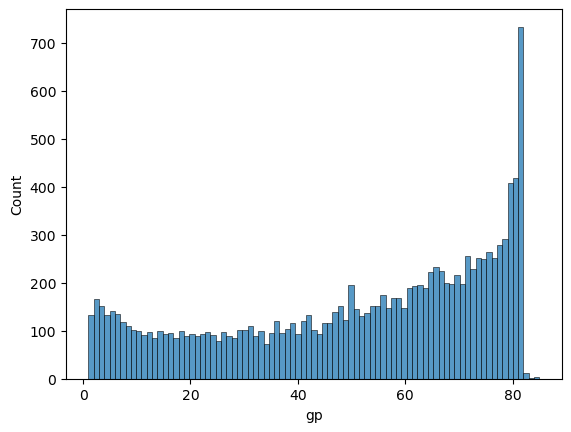

In [19]:
# Rerunning the histogram

sns.histplot(df['gp'], bins=85)

/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='usg_pct', ylabel='Count'>

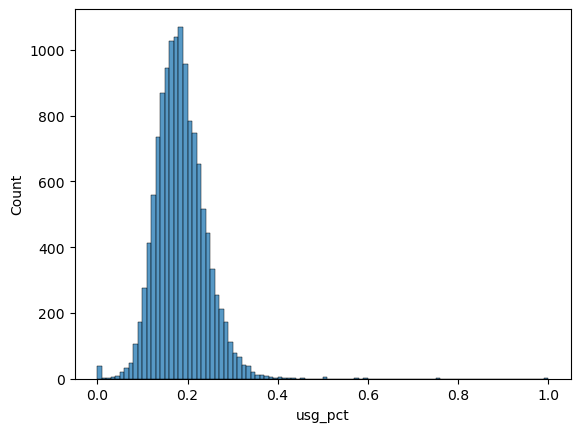

In [38]:
# Looking at the distribution of usage percentage

sns.histplot(df['usg_pct'], bins=100)

In [39]:
# Checking the mean

df['usg_pct'].mean()

0.18464076611647462

In [40]:
# Checking the median

df['usg_pct'].median()

0.181

In [42]:
# Checking the max

df['usg_pct'].max()

1.0

In [43]:
# Checking the min

df['usg_pct'].min()

0.0

# 3. Preparing data for regression analysis

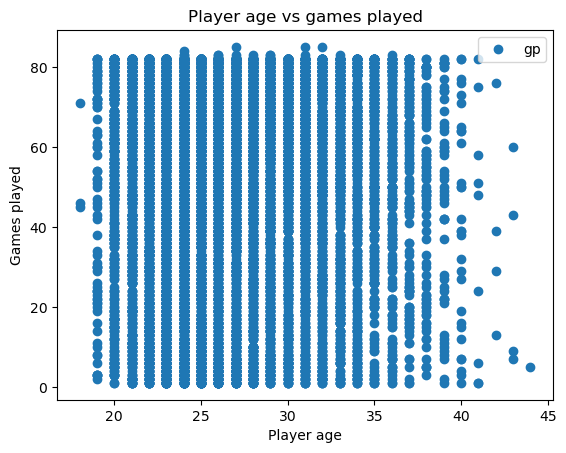

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='gp',style='o')
plt.title('Player age vs games played')  
plt.xlabel('Player age')
plt.ylabel('Games played')  
plt.show()

The hypothesis I would like to examine further from this scatterplot is that games played increases first with age, then decreases again after 35, though overall generally decreases. 

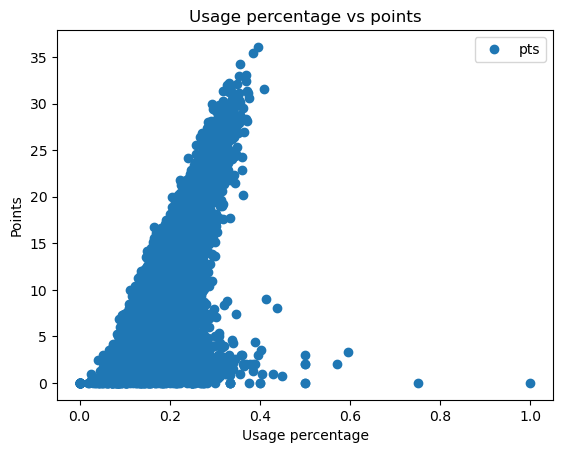

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'usg_pct', y='pts',style='o')
plt.title('Usage percentage vs points')  
plt.xlabel('Usage percentage')
plt.ylabel('Points') 
plt.show()

Here there is a mostly linear correlation between usage percentage and points scored, with some outliers that have very high usage percentages with very few points scored. 

The hypothesis to investigate further would be that with a higher usage percentage, players score more points.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['usg_pct'].values.reshape(-1,1)
y = df['pts'].values.reshape(-1,1)

In [23]:
X

array([[0.169],
       [0.174],
       [0.175],
       ...,
       [0.168],
       [0.074],
       [0.169]])

In [24]:
y

array([[ 3.9],
       [ 3.8],
       [ 8.3],
       ...,
       [13.1],
       [ 3.4],
       [ 6.4]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

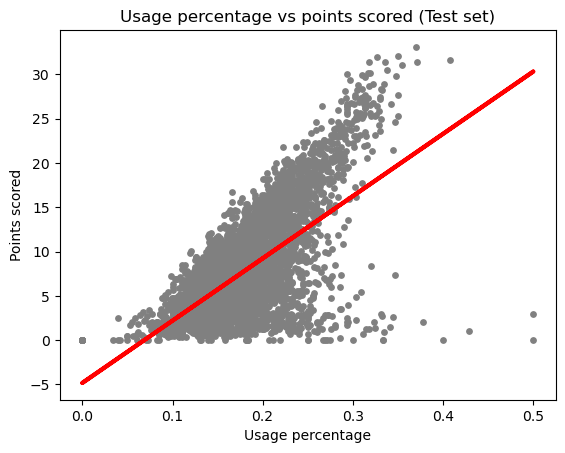

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Usage percentage vs points scored (Test set)')
plot_test.xlabel('Usage percentage')
plot_test.ylabel('Points scored')
plot_test.show()

Here we see that there appears to be a strong positive correlation, confirming our hypothesis.

In [30]:
# Create objects that contain the model summary statistics.

# Mean squared error
rmse = mean_squared_error(y_test, y_predicted)

# R2 score
r2 = r2_score(y_test, y_predicted)

In [31]:
# Printing the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[70.30125869]]
Mean squared error:  20.836957687818643
R2 score:  0.43796679826891893


In [32]:
y_predicted

array([[ 2.61977815],
       [14.57099213],
       [ 4.02580333],
       ...,
       [ 0.08893284],
       [ 4.09610458],
       [14.64129339]])

In [33]:
# Creating a dataframe to compare the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,2.6,2.619778
1,21.5,14.570992
2,9.4,4.025803
3,1.8,7.611168
4,4.4,9.228096
5,5.1,5.150623
6,15.9,10.704423
7,6.3,5.150623
8,6.3,6.697251
9,9.7,6.767552


# 5. Comparing values

In [34]:
# Predicting

y_predicted_train = regression.predict(X_train)

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[70.30125869]]
Mean squared error:  21.52046754187965
R2 score:  0.3988345017125897


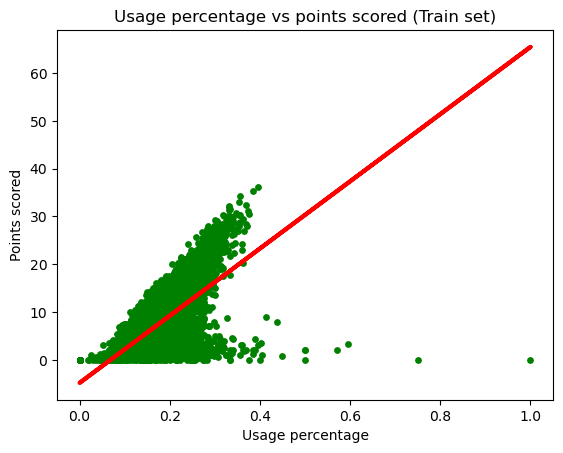

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Usage percentage vs points scored (Train set)')
plot_test.xlabel('Usage percentage')
plot_test.ylabel('Points scored')
plot_test.show()

Based on the above charts as well as the dataframe comparing the actual and predicted values of y, we can see that the model did not perform very well. The MSE is very large, although this may very well be due to the fact that outliers have not been removed, and the model would expect players with very high usage percentages to have very high scoring output, while in actuality, the opposite seems to be true. Given that the R2 is around 0.4, this would indicate a positive correlation, though not a very strong one. Again, this is something that I believe is impacted by the outliers found in the dataset.

# 6. Removing outliers and rerunning analysis

In [46]:
# Cleaning the outlier values from "usg_pct"

df_test = df[df['usg_pct'] < 0.5] 

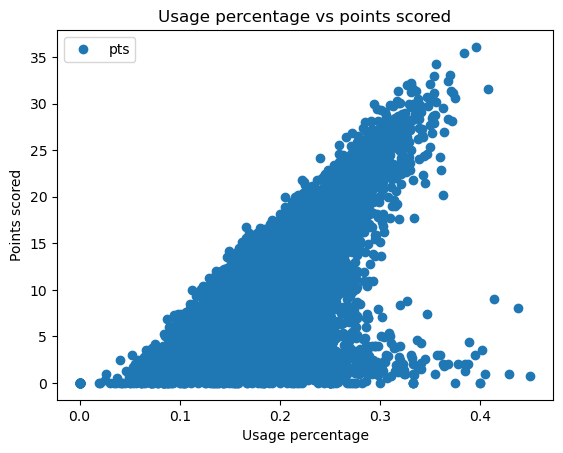

In [47]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'usg_pct', y='pts', style='o')  
plt.title('Usage percentage vs points scored')  
plt.xlabel('Usage percentage')  
plt.ylabel('Points scored')  
plt.show()

In [48]:
# Reshape again.

X_2 = df_test['usg_pct'].values.reshape(-1,1)
y_2 = df_test['pts'].values.reshape(-1,1)

In [49]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [50]:
# Running and fitting the regression

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [51]:
# Predicting

y_predicted_2 = regression.predict(X_test_2)

In [52]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[77.18128703]]
Mean squared error:  20.624083993897884
R2 score:  0.43018598187993706


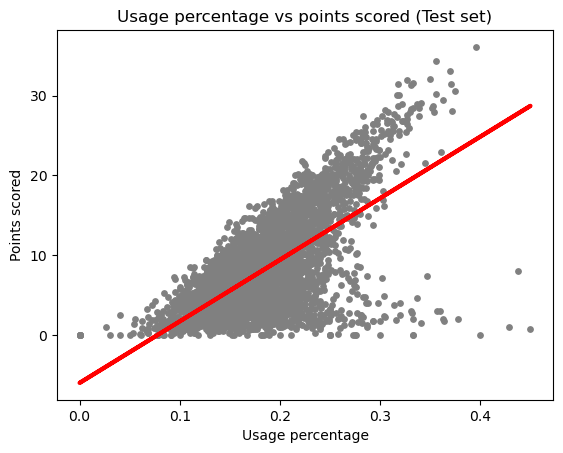

In [54]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Usage percentage vs points scored (Test set)')
plot_test.xlabel('Usage percentage')
plot_test.ylabel('Points scored')
plot_test.show()

In [55]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(25)

,Actual,Predicted
0,14.1,10.500588
1,14.3,8.956962
2,6.1,9.728775
3,20.1,14.050927
4,4.4,9.420050
5,9.5,9.574412
6,1.5,8.802599
7,11.3,8.802599
8,7.7,6.332798
9,5.7,4.171722


While the MSE is slightly smaller, thereby indicating that the output is closer to the actual value, the R2 value has remained the same. Overall, removing the outliers improved the model slightly, however there seem to be a set of values above the line and a set of values below it. I think this data would be more suited to a cluster analysis, to look at this in a more granular way and drill down on the details, as there seem to be more going on here.